K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.

Distance Metrics Used in KNN Algorithm

Euclidean Distance
This is nothing but the cartesian distance between the two points which are in the plane/hyperplane. Euclidean distance can also be visualized as the length of the straight line that joins the two points which are into consideration. This metric helps us calculate the net displacement done between the two states of an object.

Manhattan Distance metric is generally used when we are interested in the total distance traveled by the object instead of the displacement. This metric is calculated by summing the absolute difference between the coordinates of the points in n-dimensions.

Minkowski Distance
We can say that the Euclidean, as well as the Manhattan distance, are special cases of the Minkowski distance.



####Diabetes Classification-KNN####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')
#Print the first 5 rows of the dataframe.
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
diabetes_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Following columns or variables have an invalid zero value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [6]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


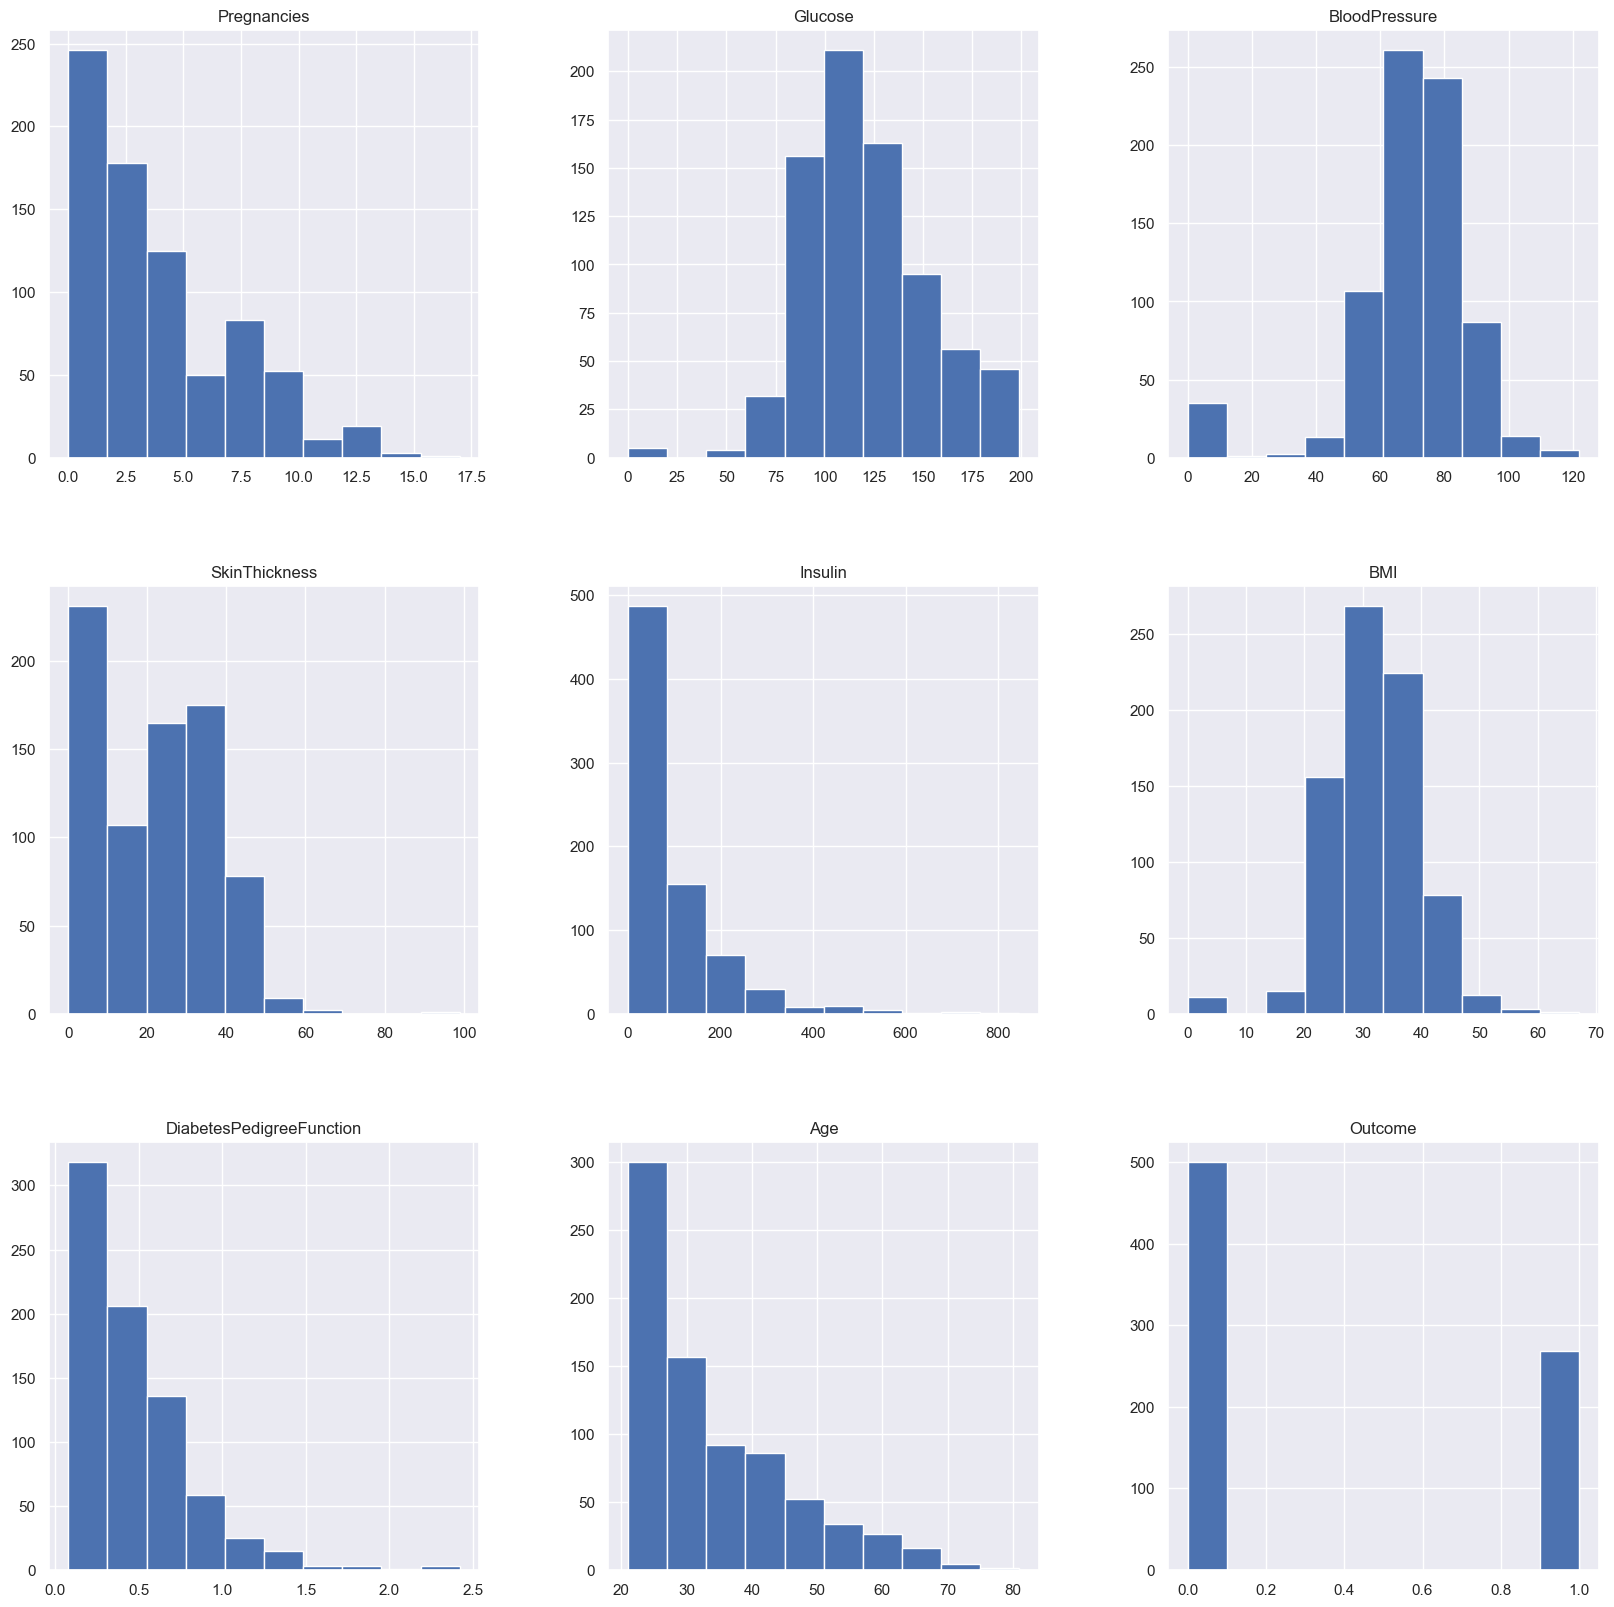

In [7]:
# Understanding data distribution 
p = diabetes_data.hist(figsize = (20,20))

In [8]:
#Aiming to impute nan values for the columns in accordance with their distribution
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

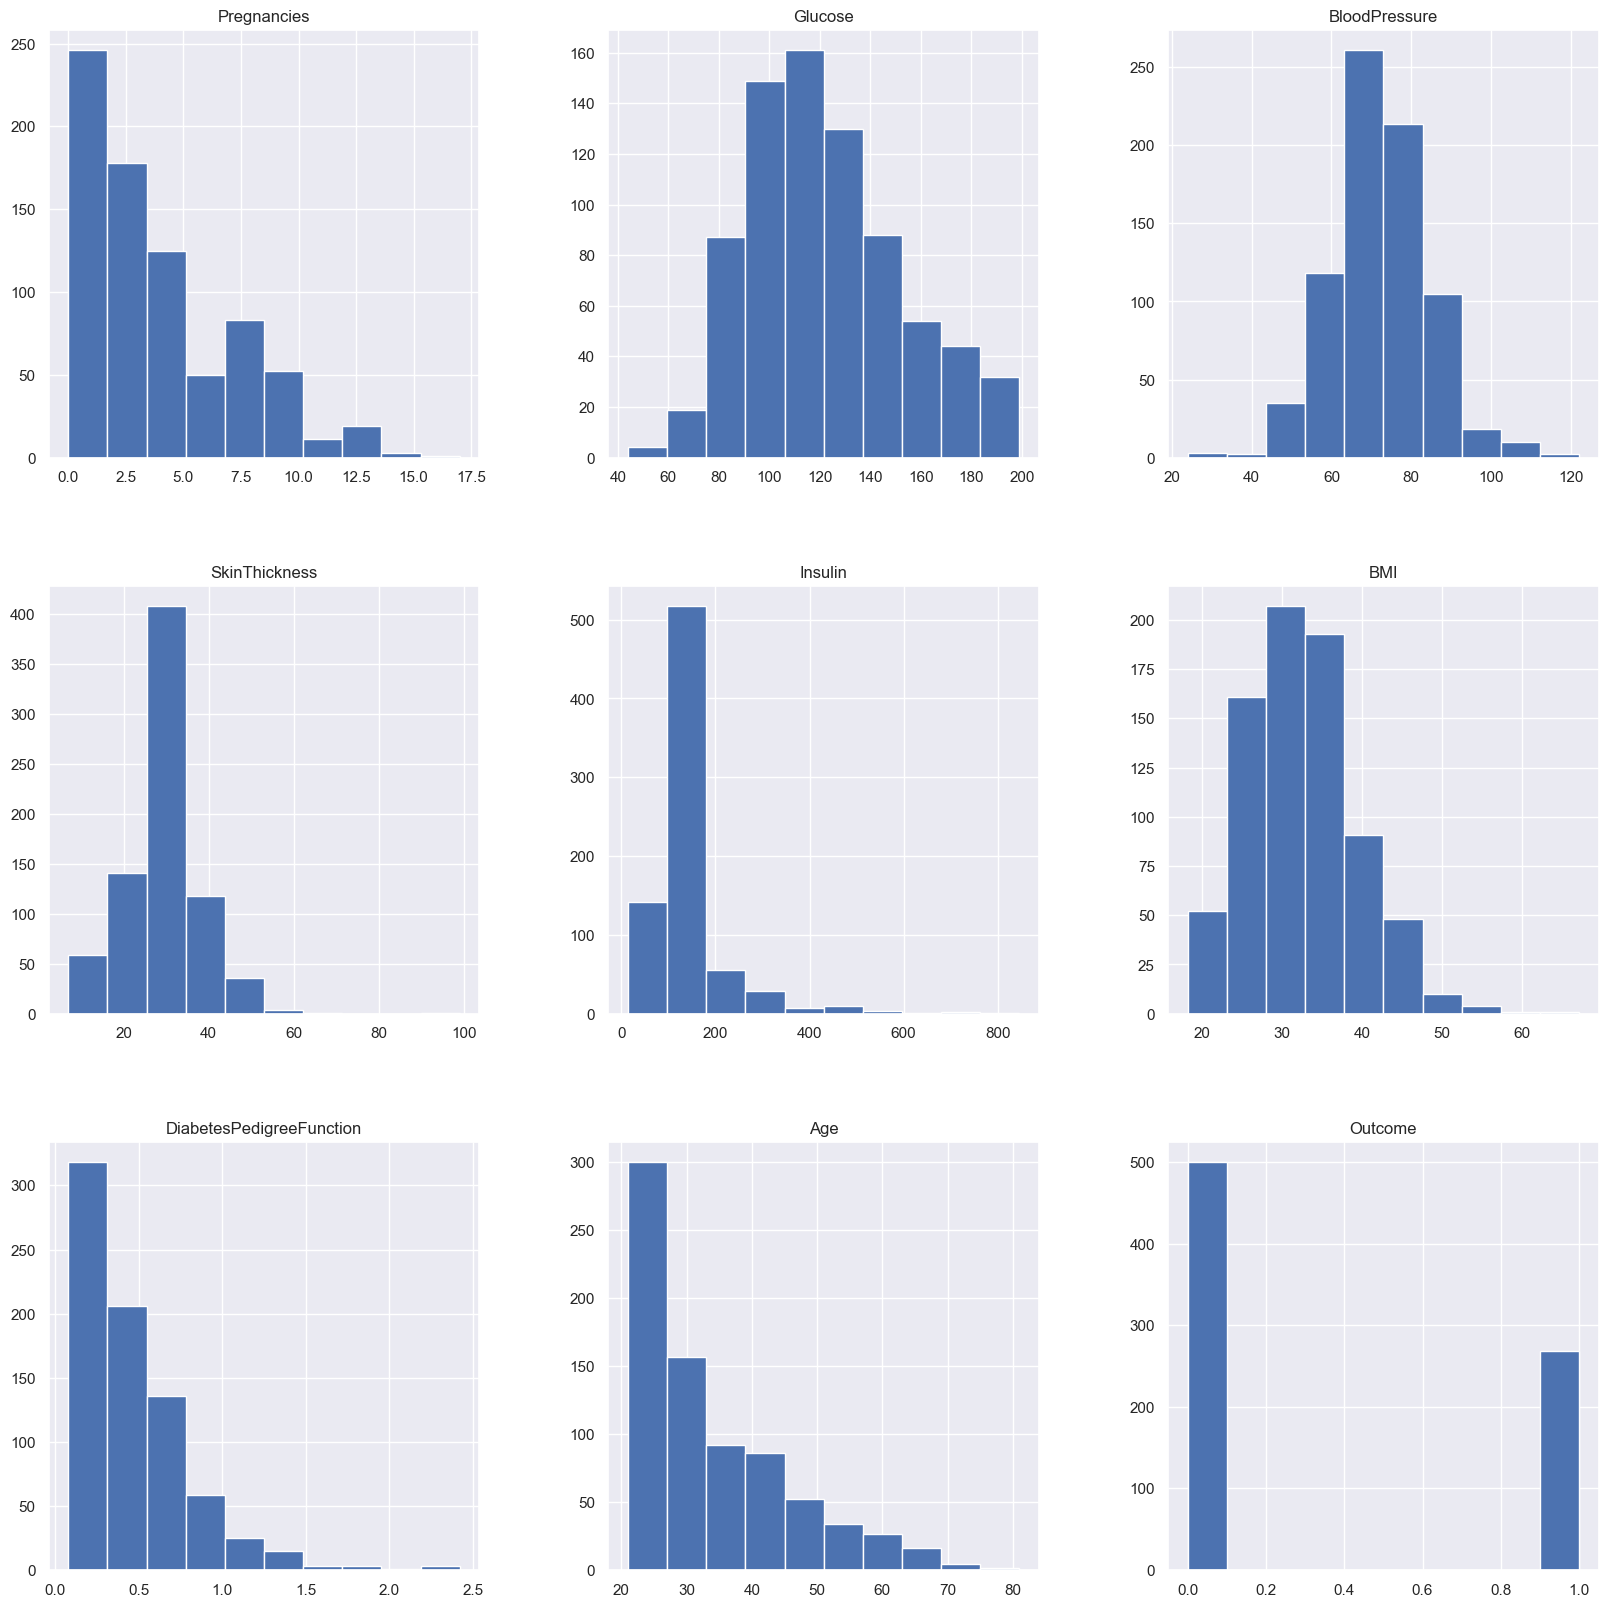

In [9]:
#Plotting after Nan removal
p = diabetes_data_copy.hist(figsize = (20,20))

In [10]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

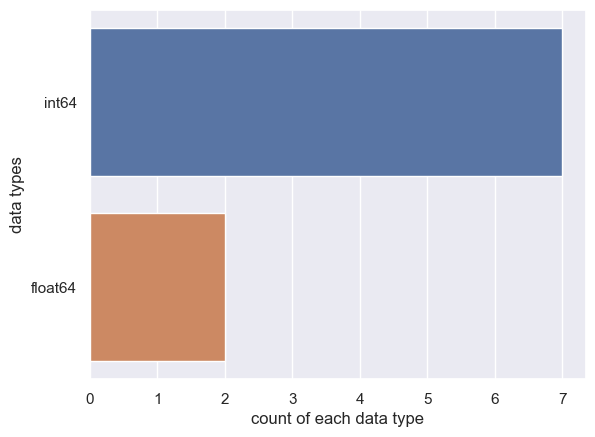

In [11]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

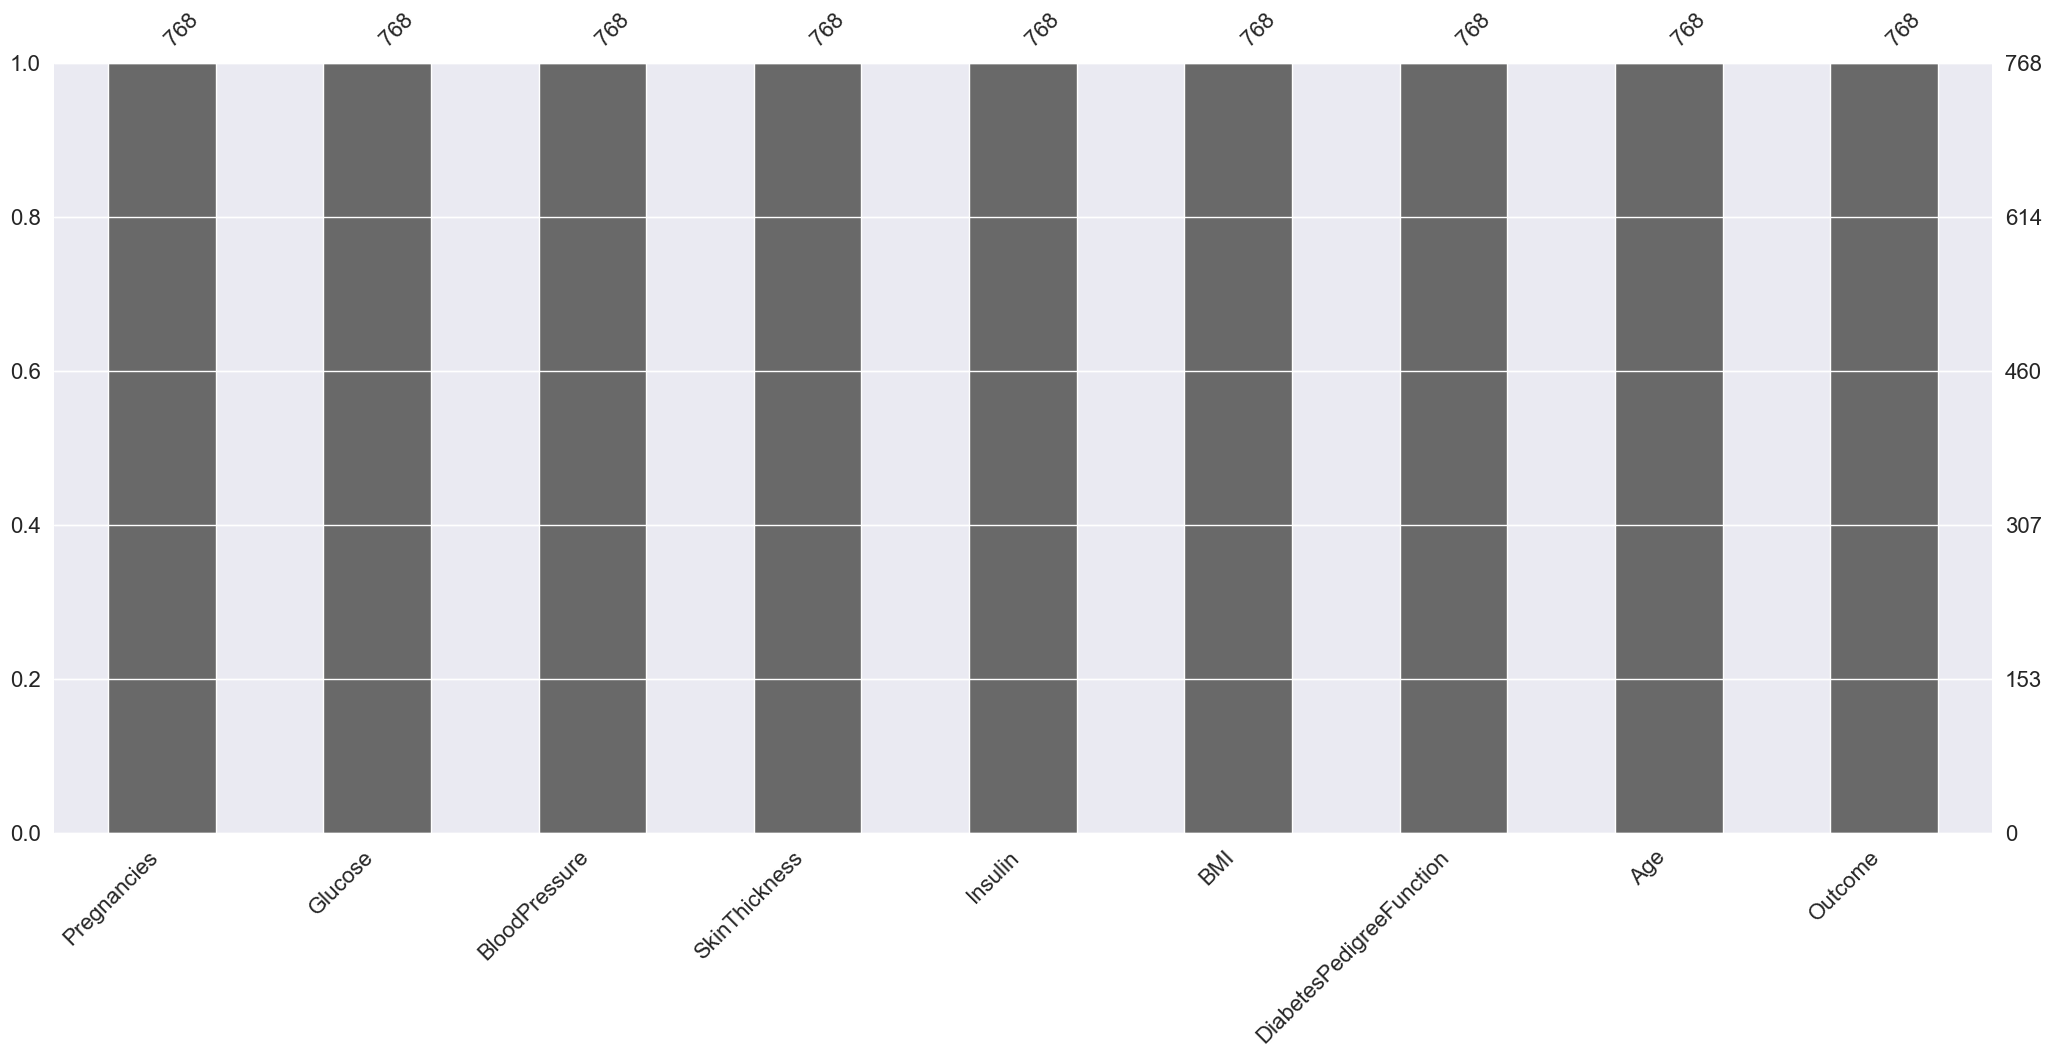

In [12]:
# null count analysis
import missingno as msno
import matplotlib.pyplot as plt

p = msno.bar(diabetes_data)
plt.show()

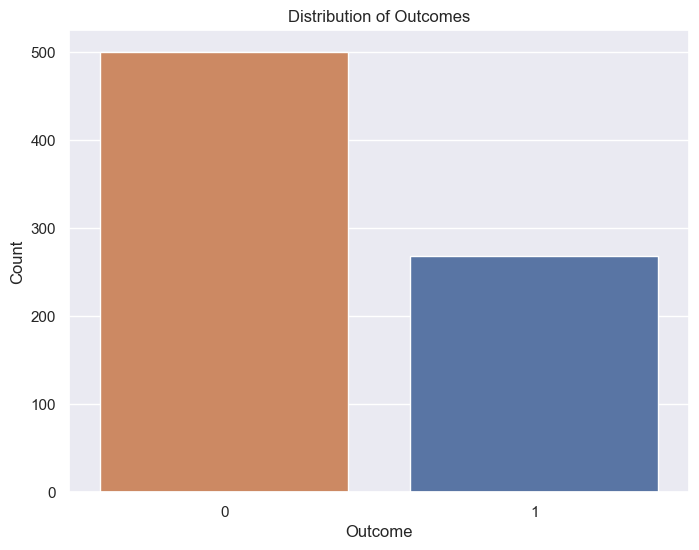

In [13]:
# Define color palette
palette = {val: f"C{i}" for i, val in enumerate(diabetes_data['Outcome'].unique())}

# Plot count of outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x="Outcome", data=diabetes_data, palette=palette)

# Set plot labels and title
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Outcomes")

# Show the plot
plt.show()


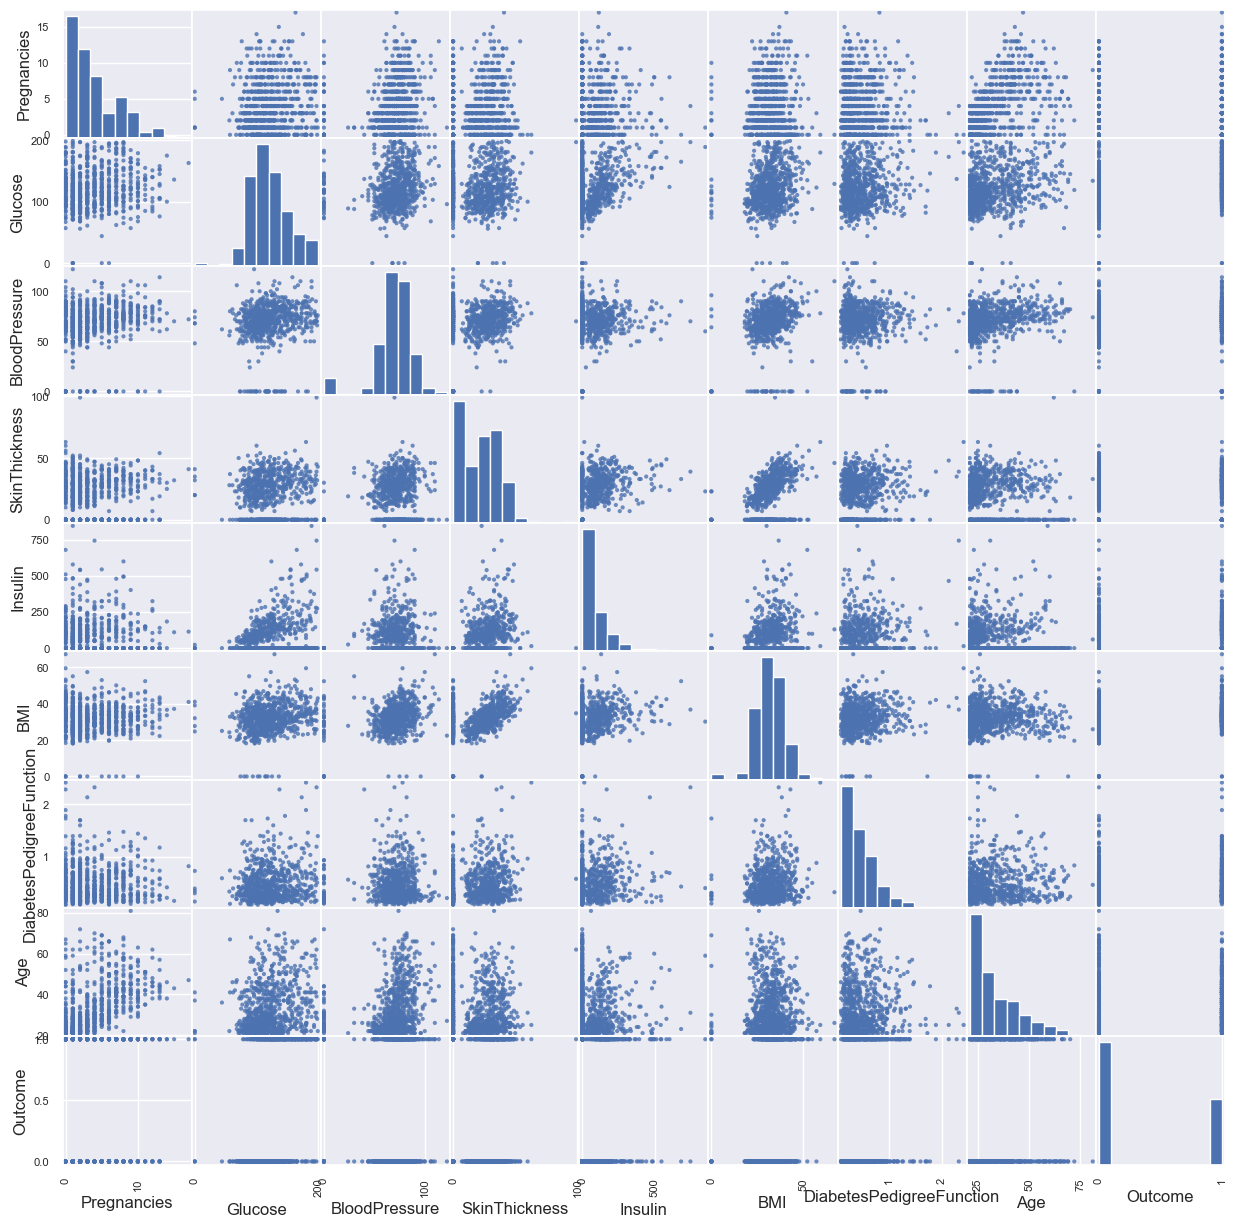

In [14]:
import pandas.plotting as pdplt
from pandas.plotting import scatter_matrix
# Load the diabetes dataset
diabetes_data = pd.read_csv("diabetes.csv")

# Create the scatter matrix
scatter_matrix(diabetes_data, alpha=0.8, figsize=(15, 15), diagonal="hist")

# Show the scatter matrix
plt.show()


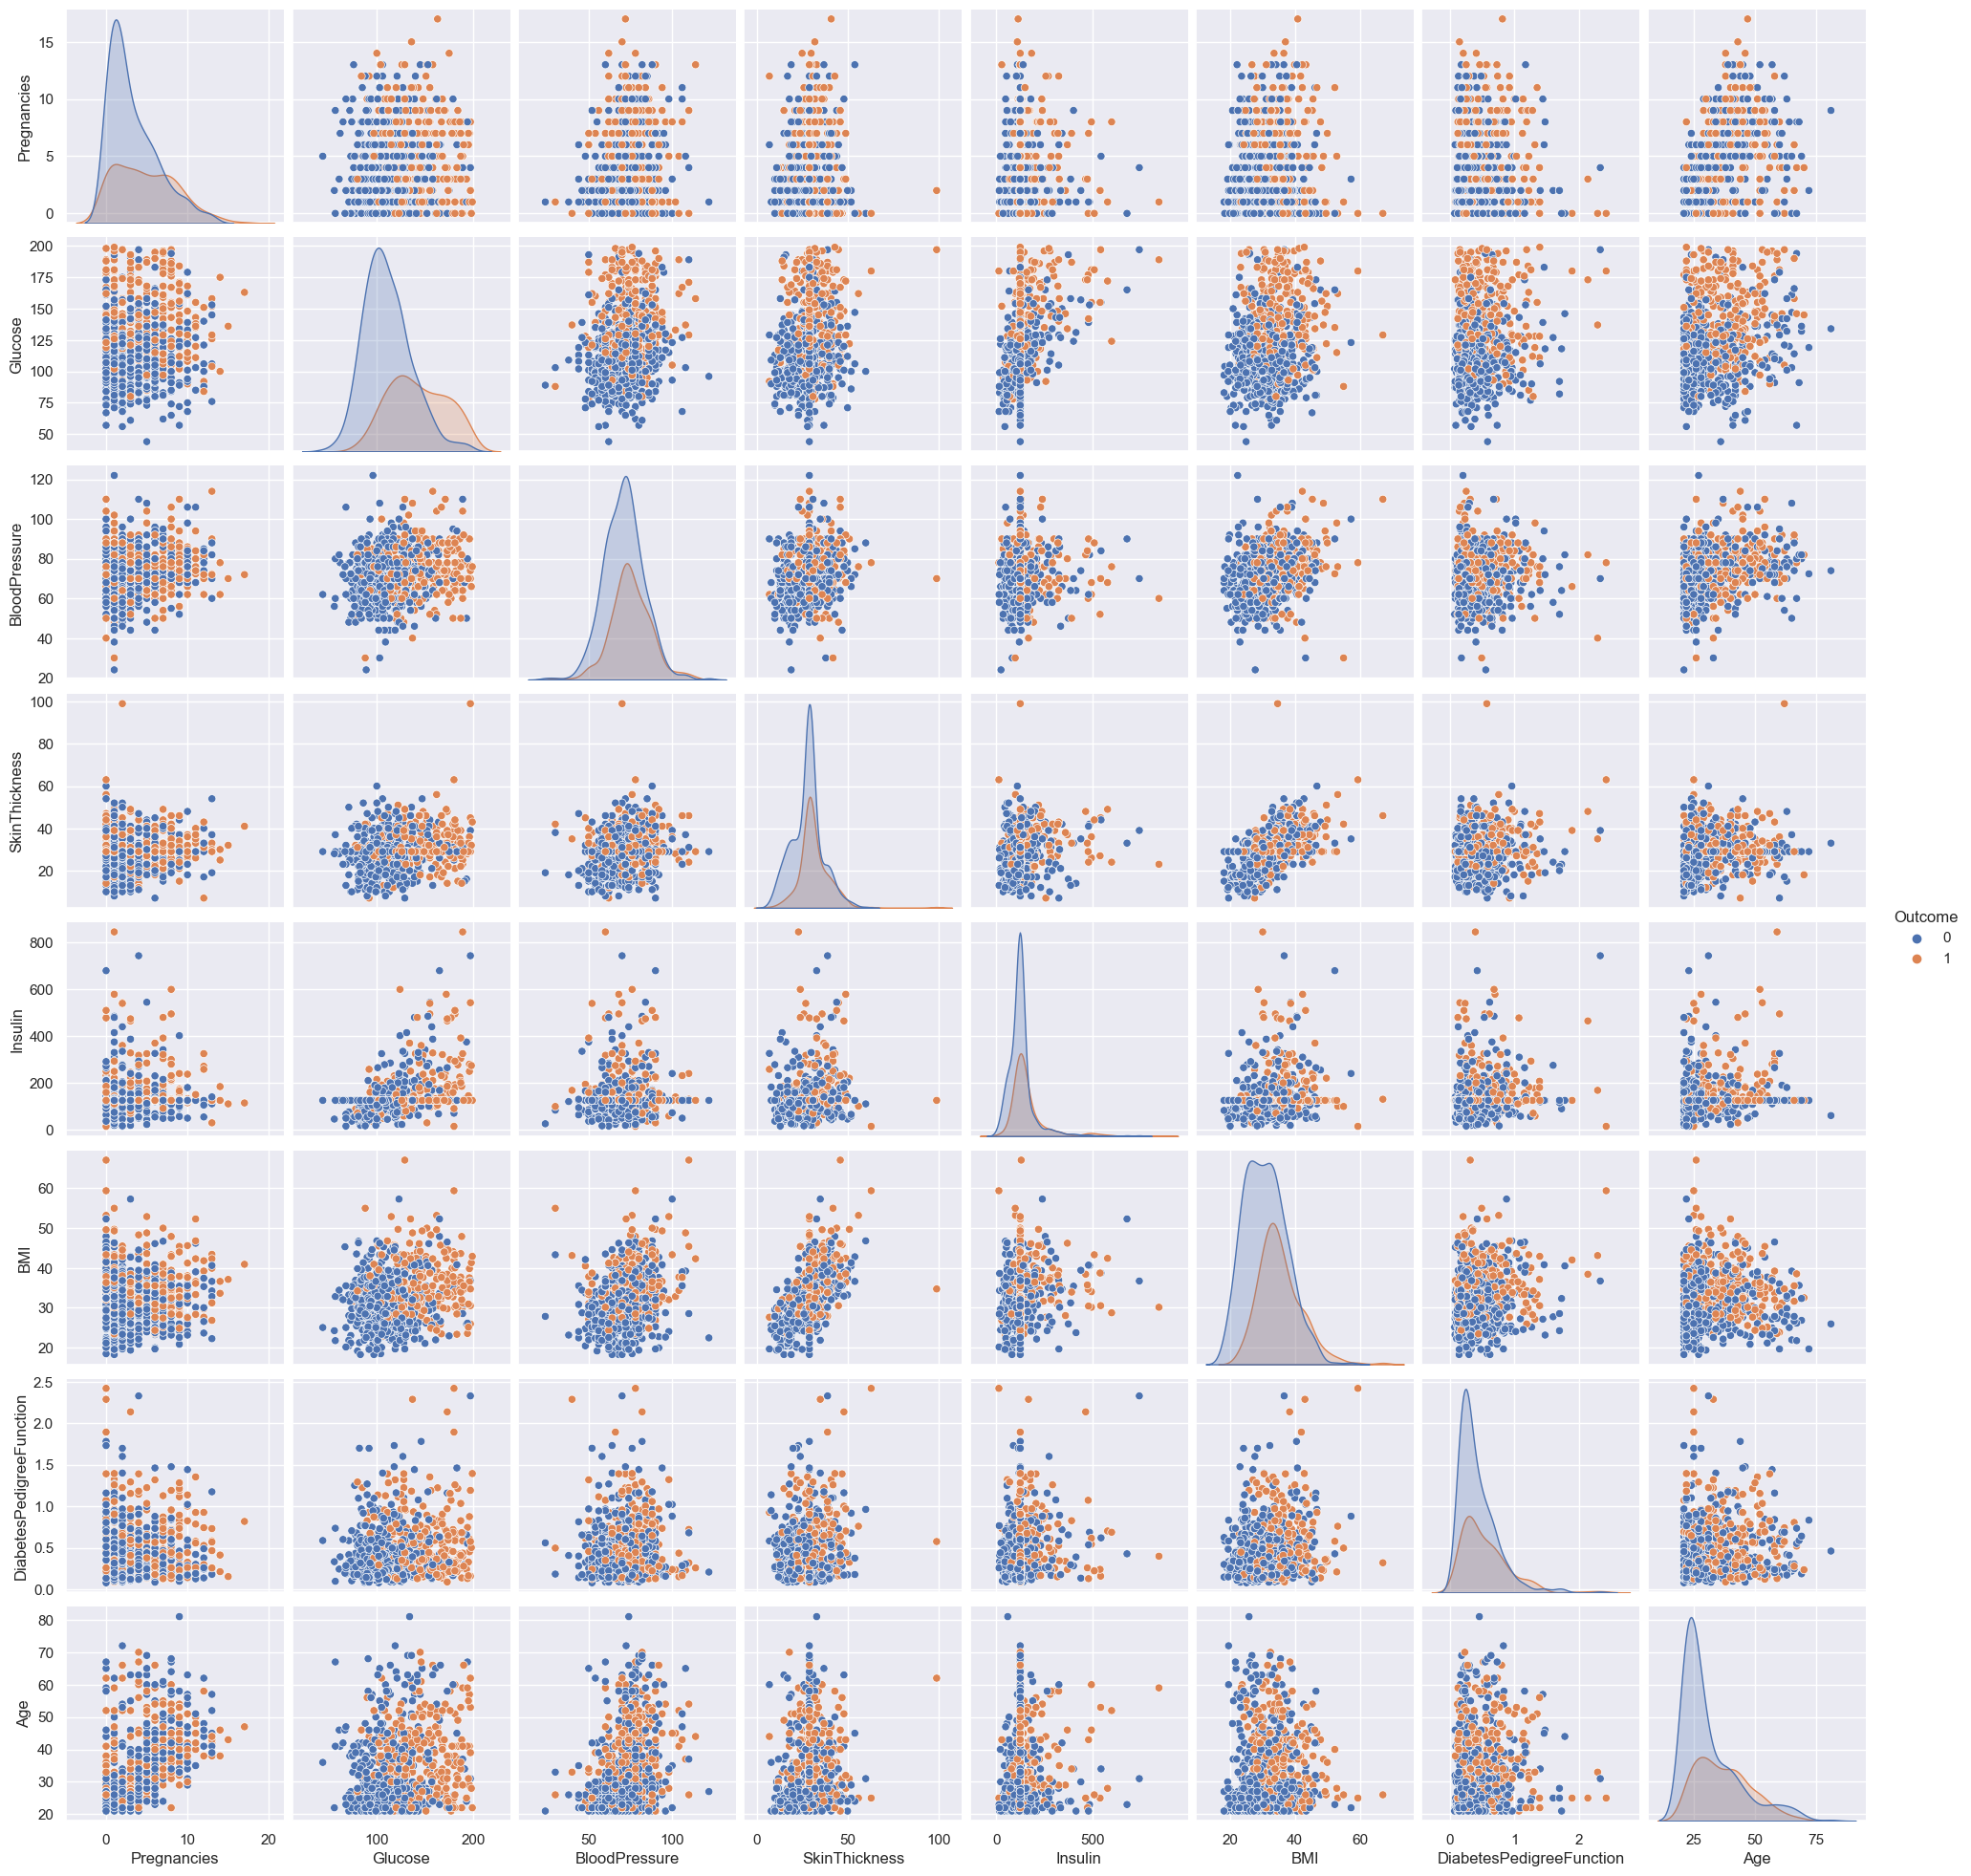

In [15]:
#Pair plot for clean data
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

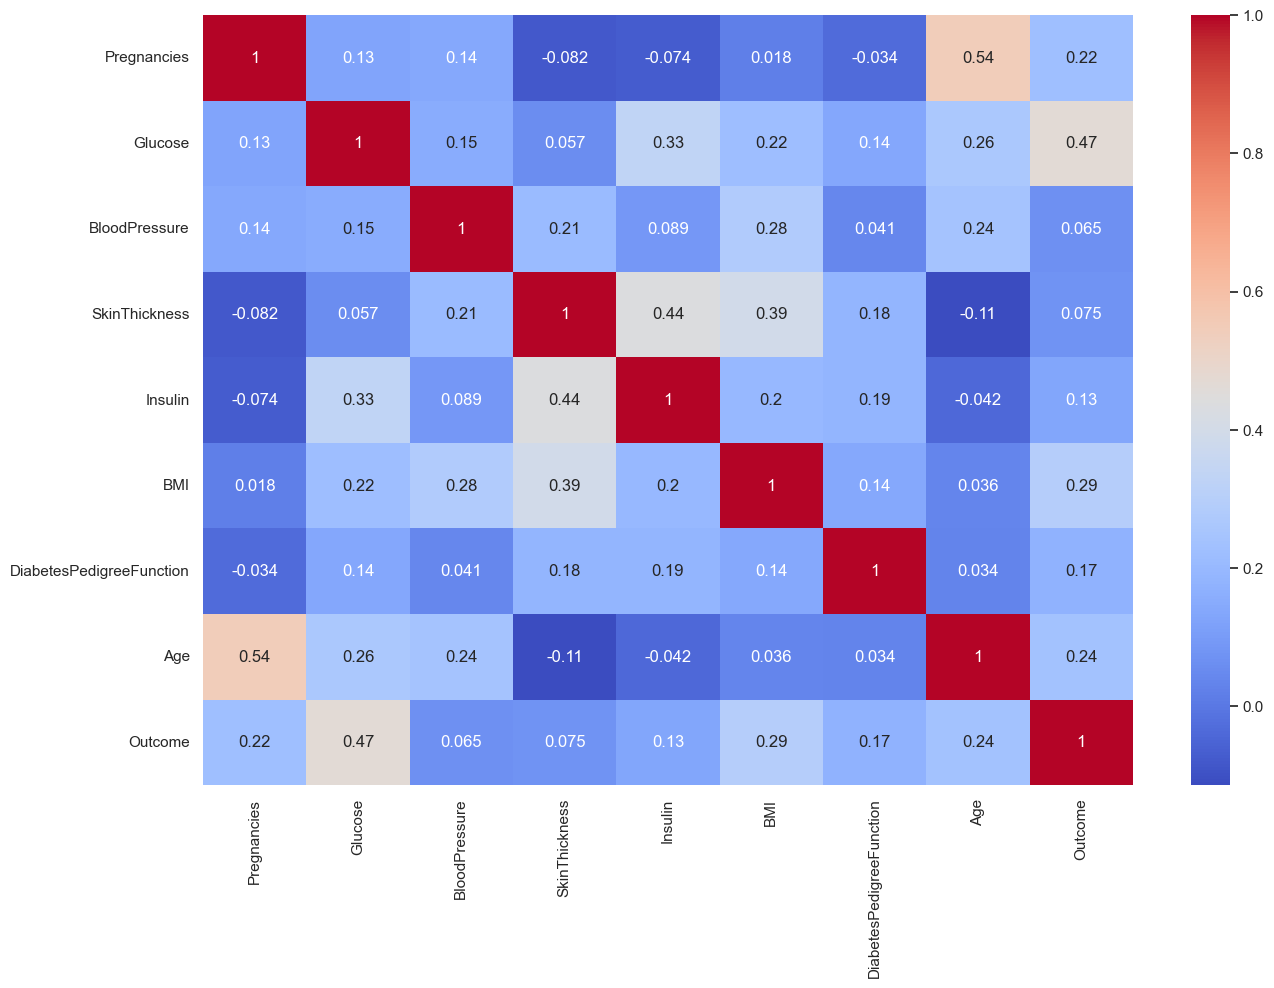

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.show()


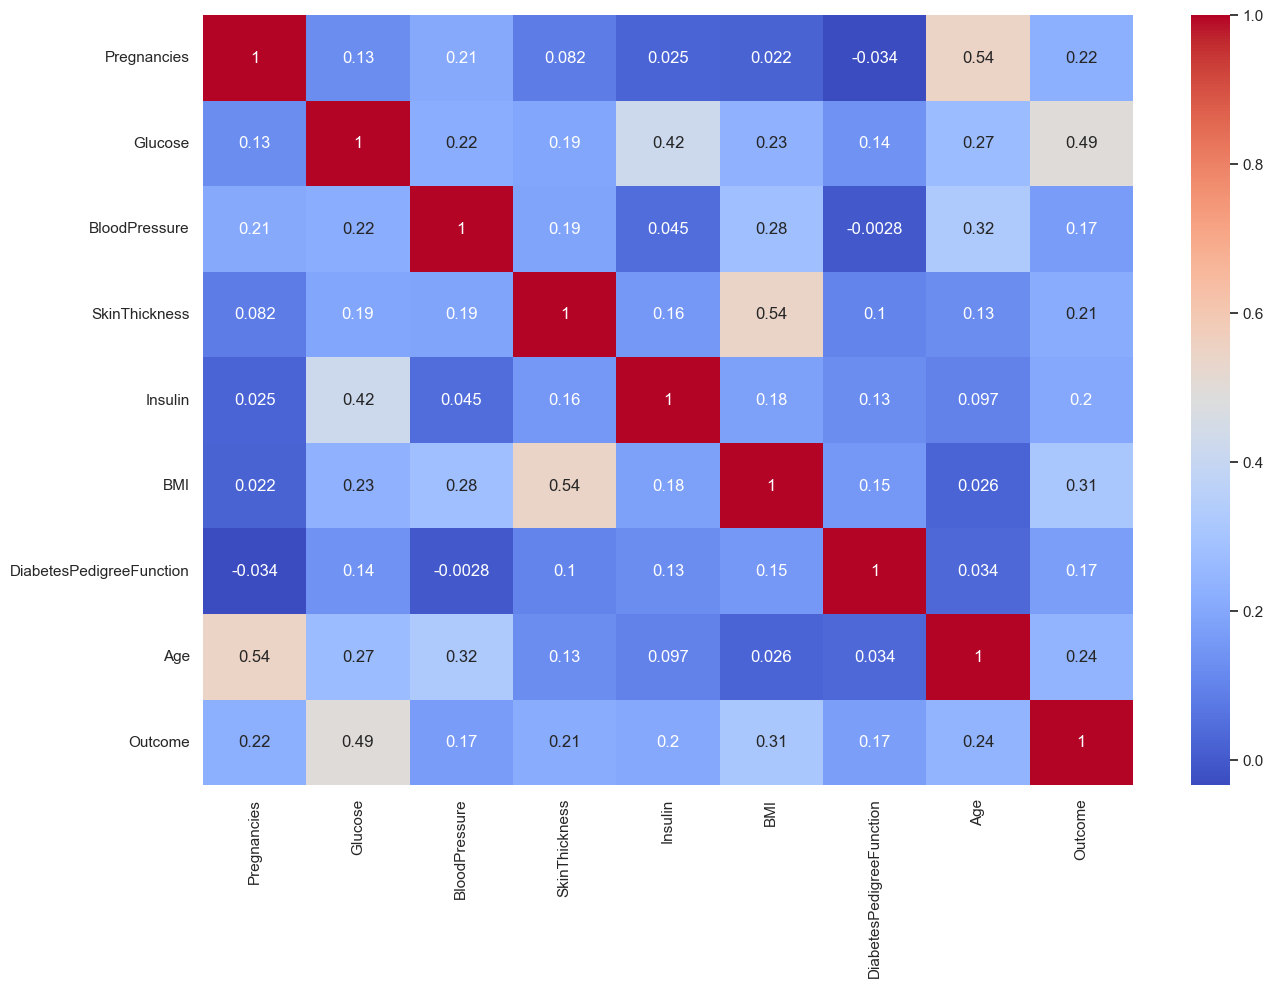

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [20]:
y = diabetes_data_copy.Outcome

In [21]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

Max train score 100.0 % and k = [1]
Max test score 76.5625 % and k = [11]


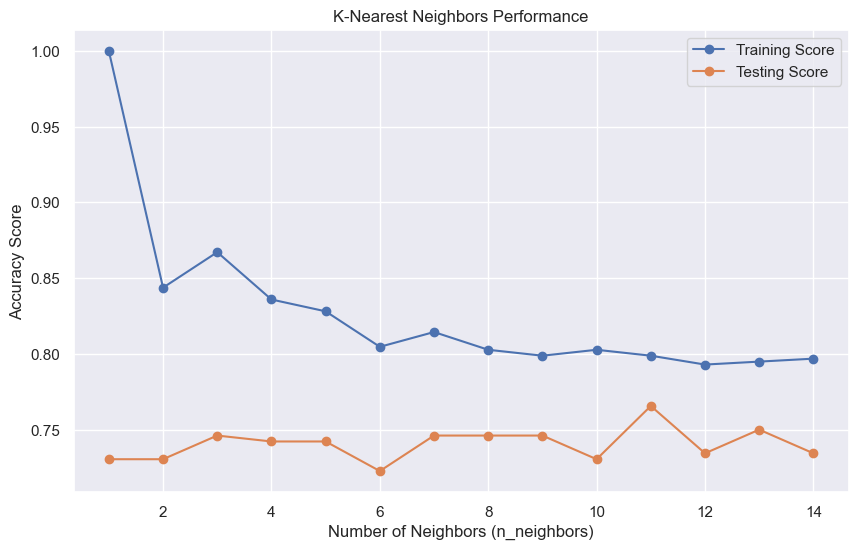

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Range of neighbors to test
neighbors_range = range(1, 15)

# Loop through different values of n_neighbors
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    
    # Append the training and testing scores to the respective lists
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_scores, label='Training Score', marker='o')
plt.plot(neighbors_range, test_scores, label='Testing Score', marker='o')
plt.title('K-Nearest Neighbors Performance')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()


In [23]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

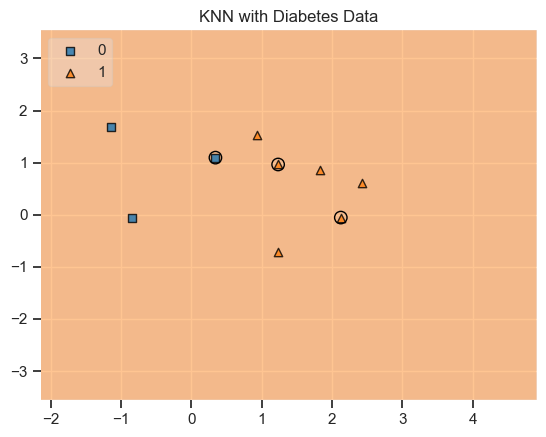

In [24]:
from mlxtend.plotting import plot_decision_regions

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

Model Performance Analysis

Confusion Matrix

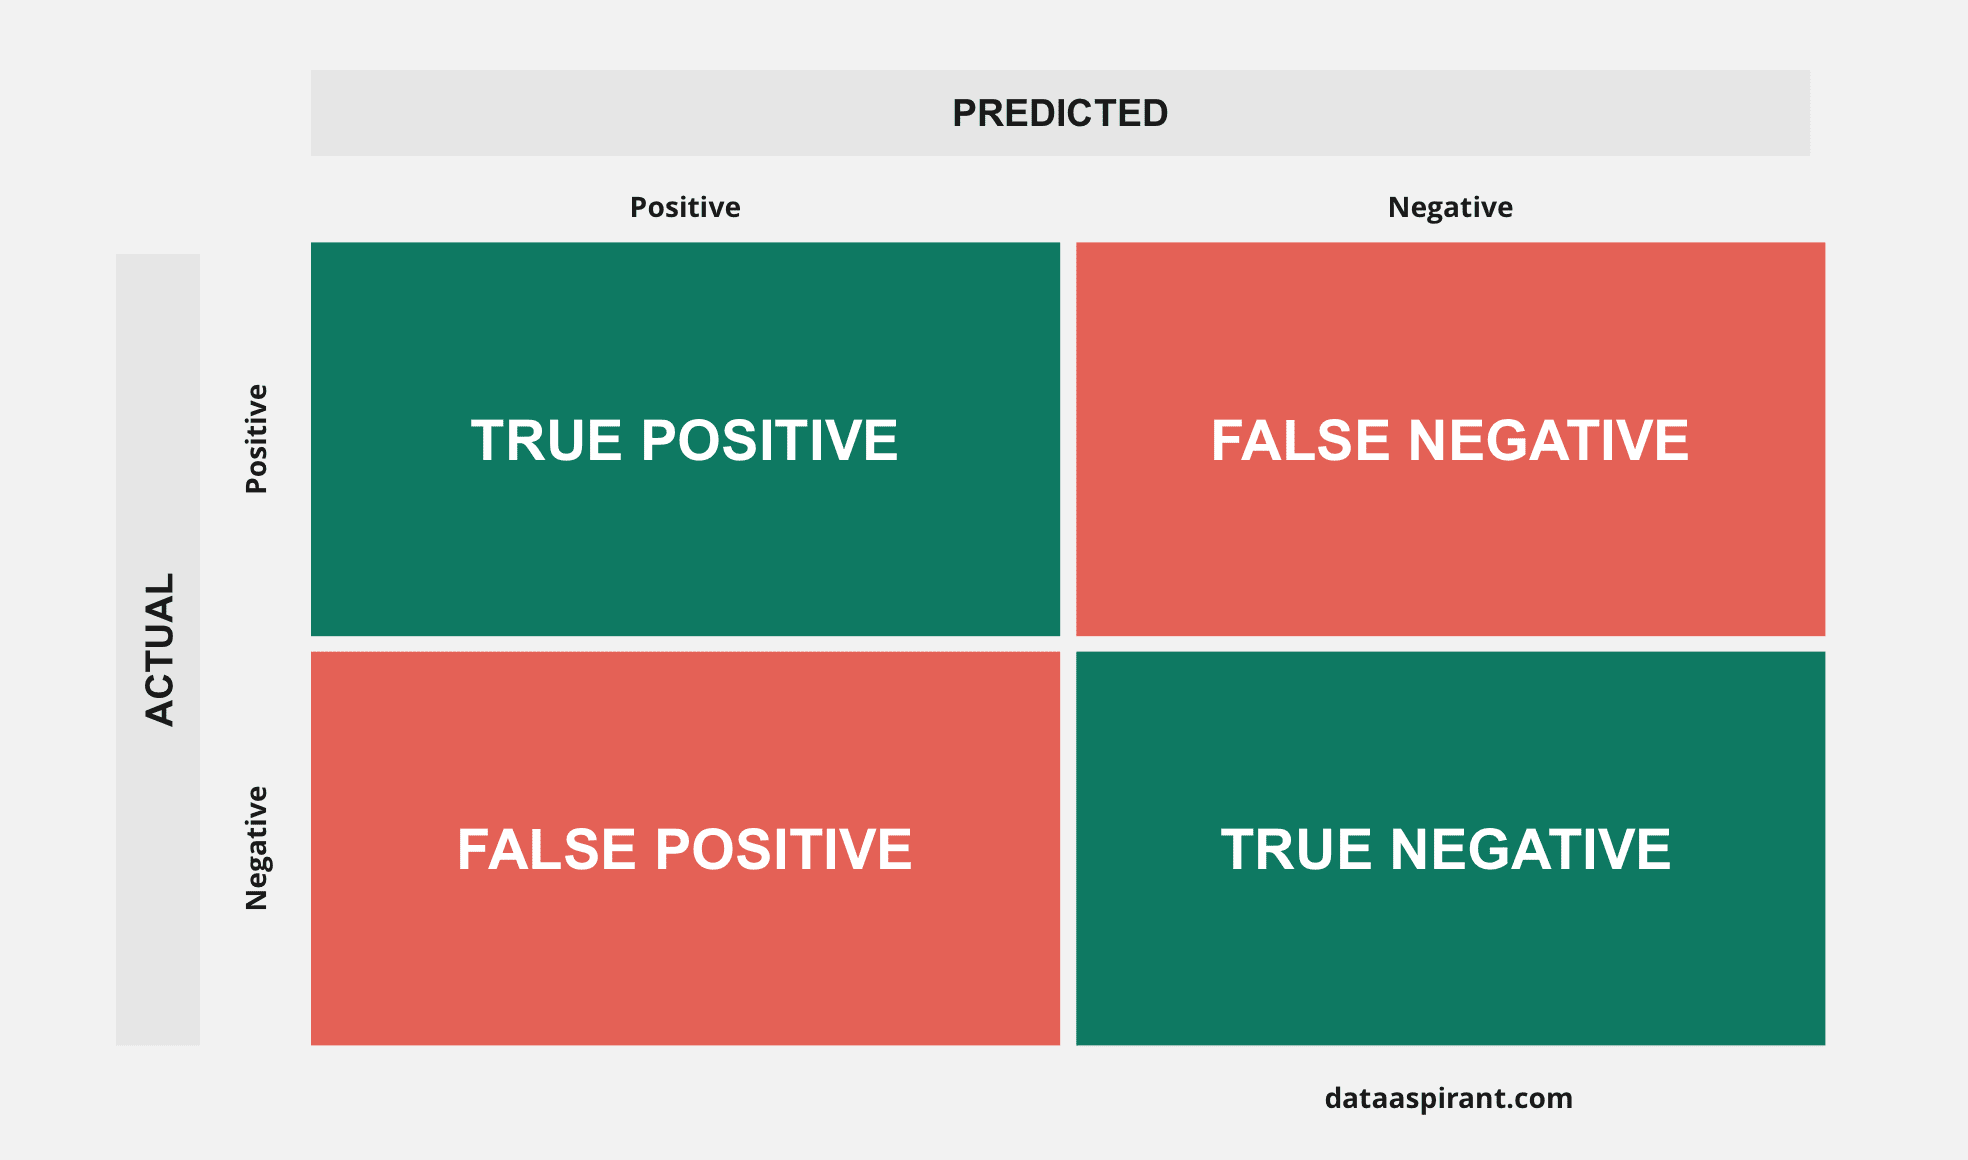

In [25]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          142  25  167
1           35  54   89
All        177  79  256

Text(0.5, 20.049999999999997, 'Predicted label')

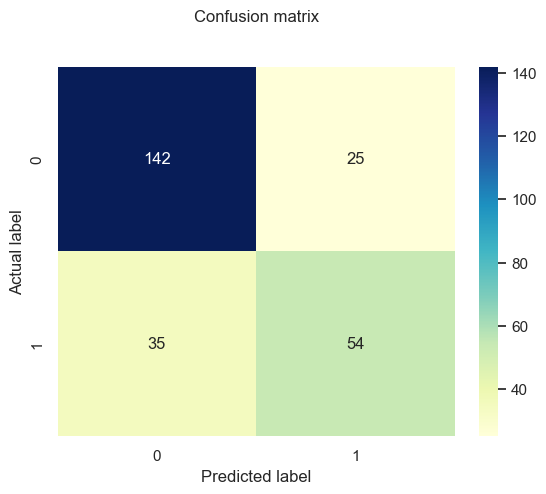

In [26]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

CLASSIFICATION REPORT

Understanding a Classification Report For Your Machine Learning Model

There are four ways to check if the predictions are right or wrong:

TN / True Negative: the case was negative and predicted negative
TP / True Positive: the case was positive and predicted positive
FN / False Negative: the case was positive but predicted negative
FP / False Positive: the case was negative but predicted positive
Precision — What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



#ROC CURVE AND AUC

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

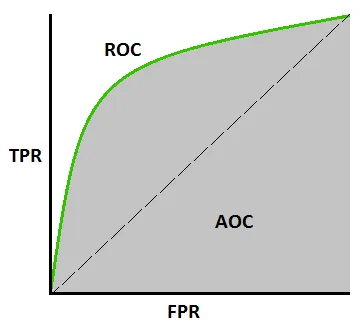

Defining terms used in AUC and ROC Curve.
TPR (True Positive Rate) / Recall /Sensitivity
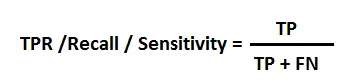

Specificity
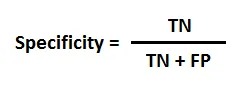

FPR
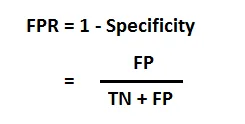


In [28]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

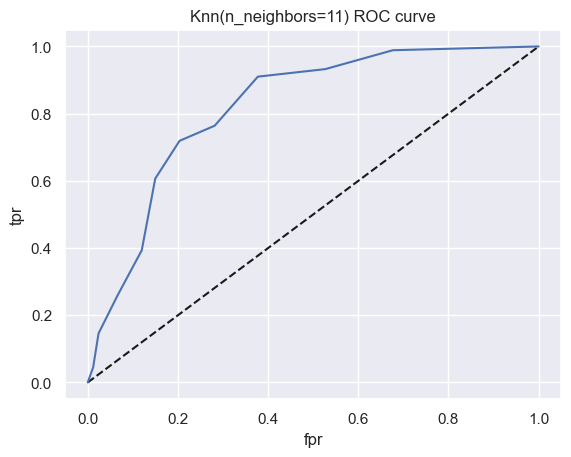

In [29]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [30]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

Hyperparameters Optimization methods – ML

Hyper Parameters are those parameters which we set for training. Hyperparameters have major impacts on accuracy and efficiency while training the model. Therefore it needed to be set accurately to get better and efficient results. Let’s first discuss some Exhaustive Search Methods to optimize the hyperparameter.

Exhaustive Search Methods
Grid Search: In Grid Search, the possible values of hyperparameters are defined into the set. Then these sets of possible values of hyperparameters are combined by using Cartesian product and form a multidimensional grid. Then we try all the parameters in the grid and select the hyperparameter setting with the best result. Random Search: This is another variant of Grid Search in which instead of trying all the points in the grid we try random points. This solves the couple of problems that are in Grid Search such as we don’t need to expand our search space exponentially every time adding new hyperparameter

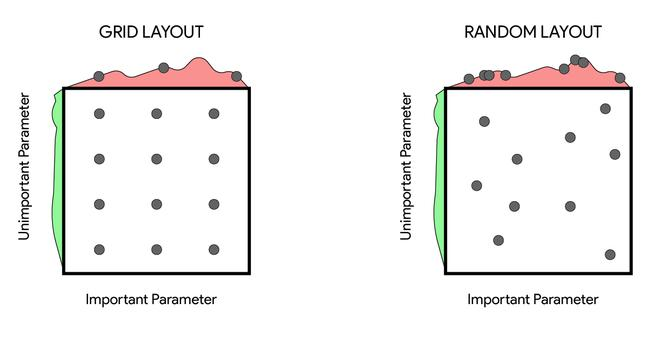

In [31]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid with a range of values for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to search for the best parameters using 5-fold cross-validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model to the data
knn_cv.fit(X, y)

# Print the best score and the corresponding best parameters
print("Best Score: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score: 0.7721840251252015
Best Parameters: {'n_neighbors': 25}
